In [34]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sktime.datasets import load_airline
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

np.random.seed(101)

MIN_COUNT=8
MAX_COUNT=30

In [35]:
y = load_airline()
y

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Airline, Length: 144, dtype: int64

In [36]:
scaler = MinMaxScaler(feature_range=(8,30))

y = scaler.fit_transform(y.values.reshape(-1,1))

y=np.round(y.flatten())

In [37]:
df=pd.DataFrame(y,columns=['sea_turtle_count'])
df

,sea_turtle_count
0,8.0
1,9.0
2,9.0
3,9.0
4,9.0
...,...
139,29.0
140,25.0
141,23.0
142,20.0


<AxesSubplot:>

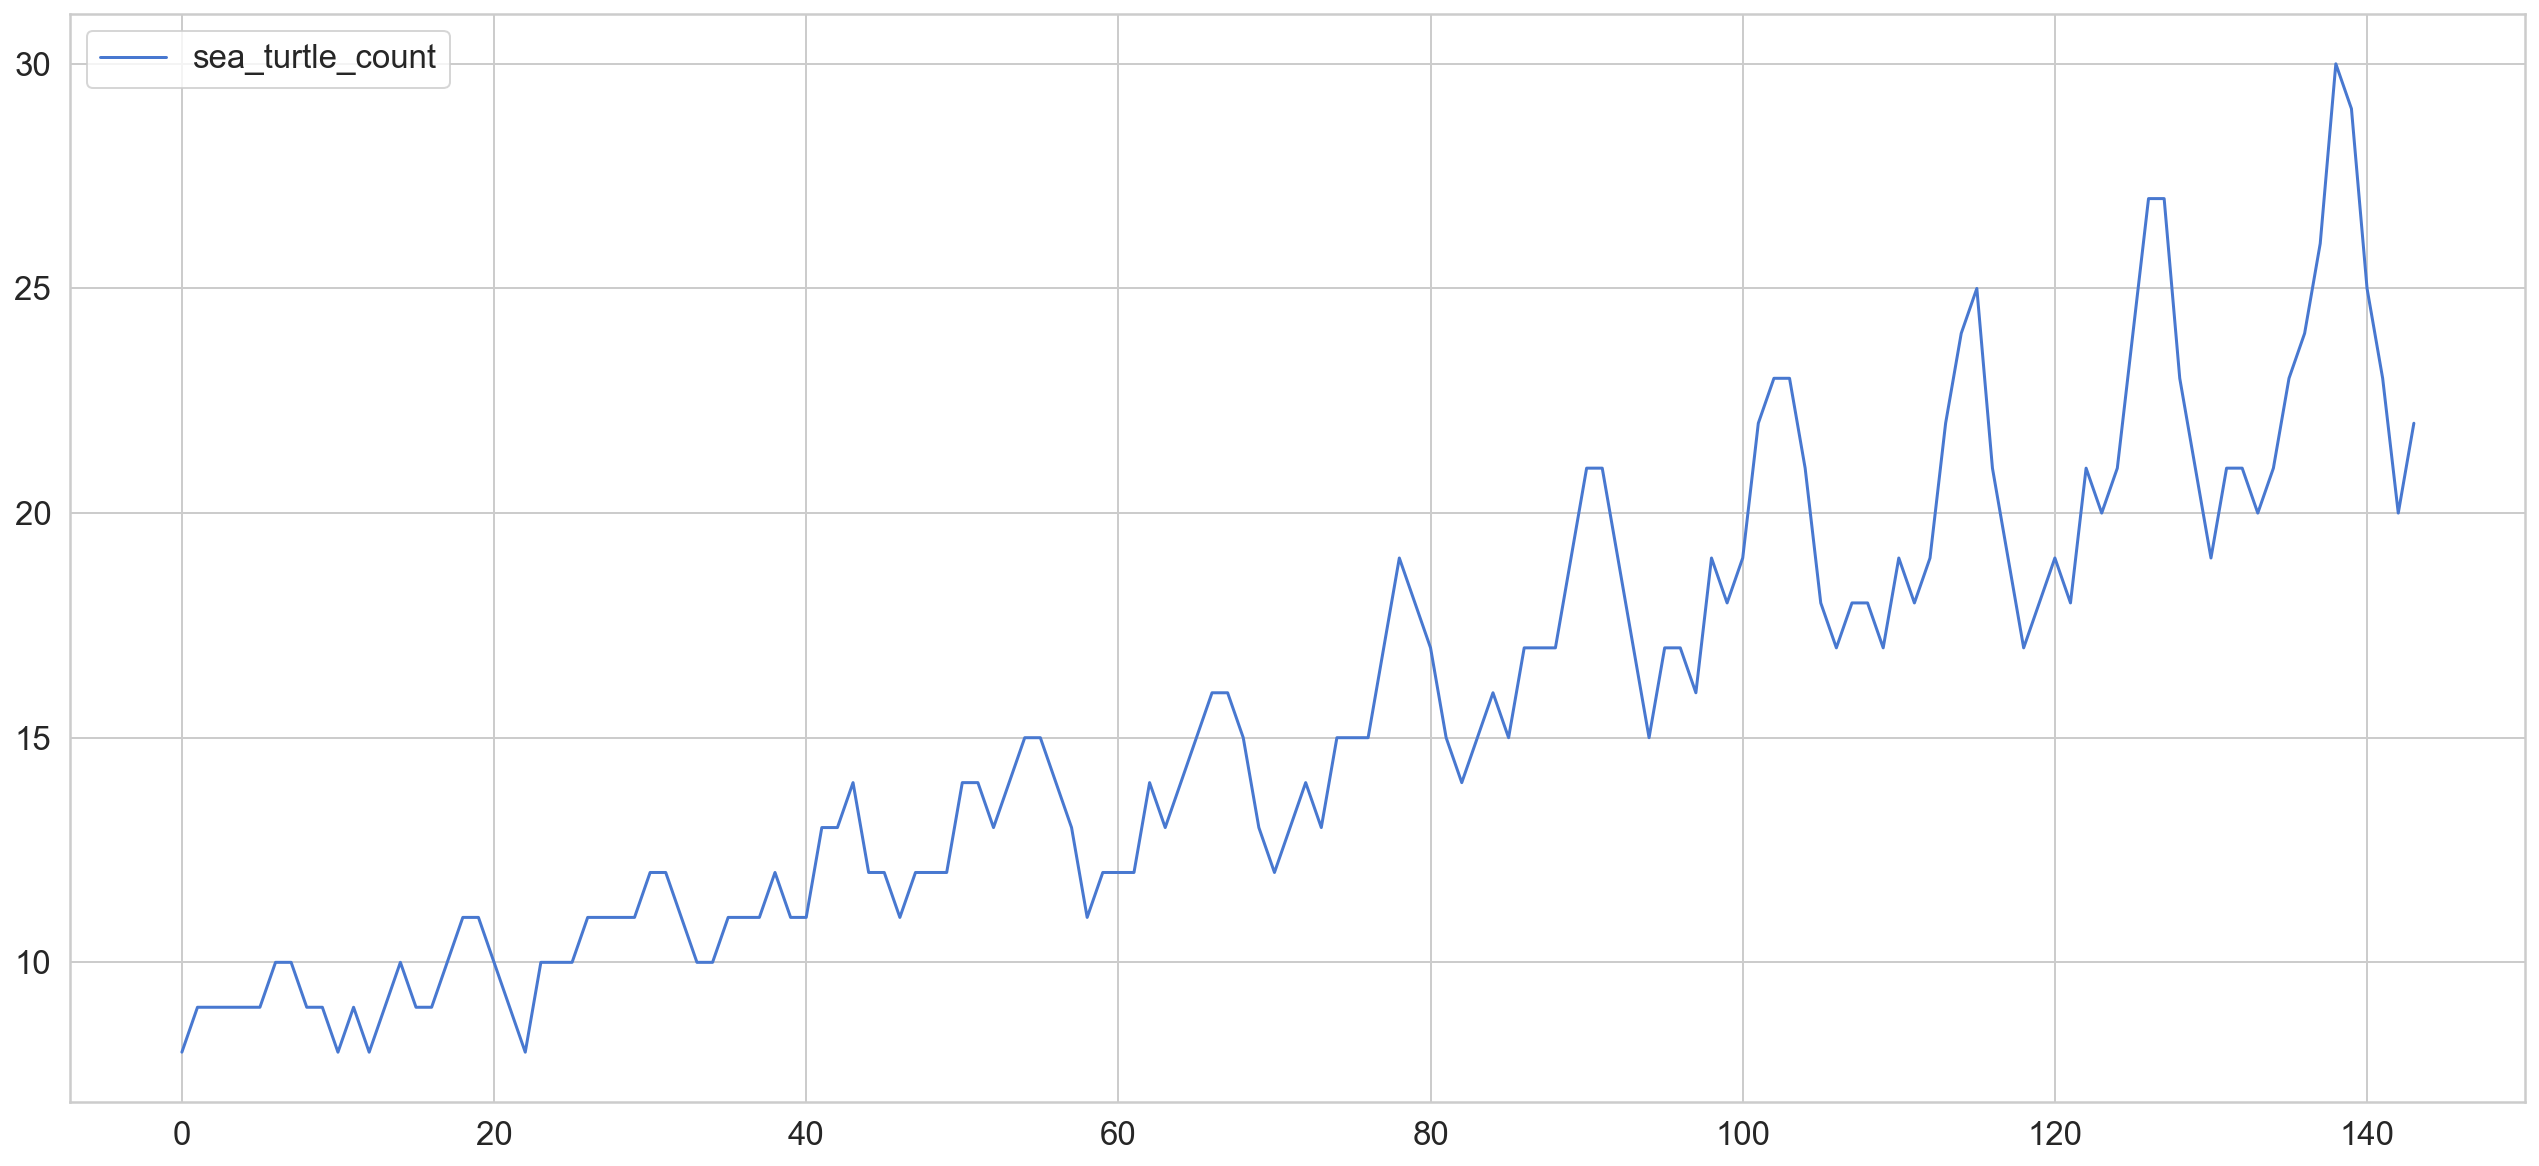

In [38]:
df.plot()

In [39]:
today=pd.Timestamp('2020-10-01')
today

Timestamp('2020-10-01 00:00:00')

In [40]:
date_array=[ today-pd.tseries.offsets.DateOffset(months=i) for i in range(3,len(df.index)*3+1,3)]
date_array.reverse()
date_array[-10:]

[Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00')]

In [41]:
len(date_array)

144

In [42]:
df['Date']=date_array
df=df.set_index('Date')
df

,sea_turtle_count
Date,
1984-10-01,8.0
1985-01-01,9.0
1985-04-01,9.0
1985-07-01,9.0
1985-10-01,9.0
...,...
2019-07-01,29.0
2019-10-01,25.0
2020-01-01,23.0


<AxesSubplot:xlabel='Date'>

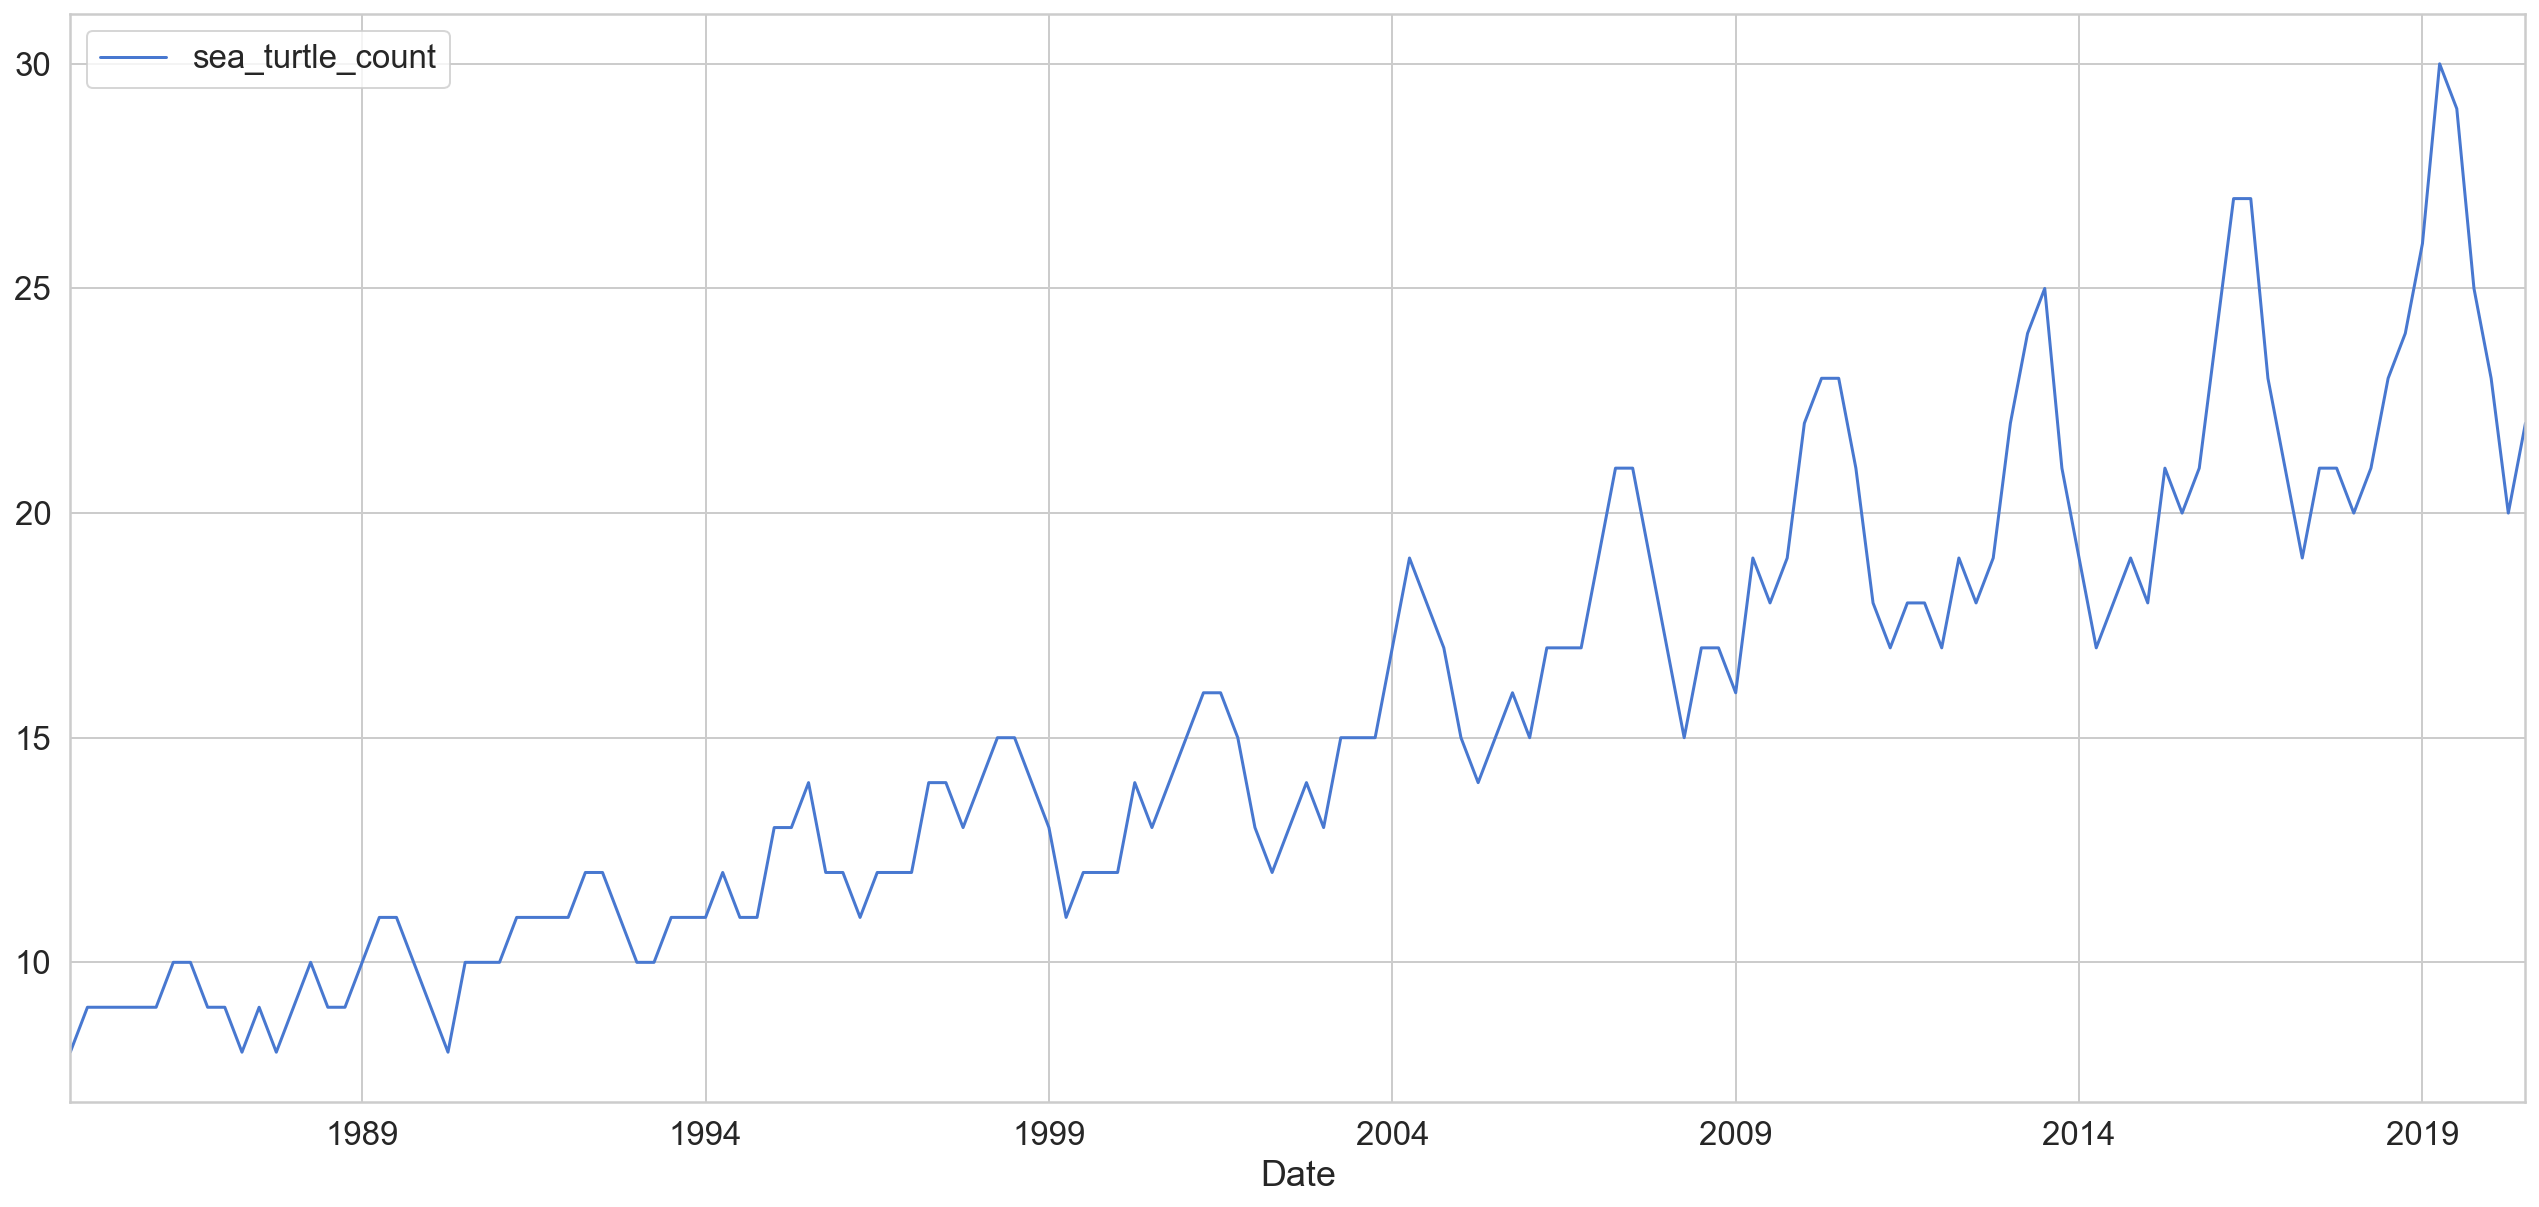

In [43]:
df.plot()

In [44]:
df.to_csv('sea_turtle_population_data.csv')